In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
import tensorflow as tf
tf.__version__

'1.9.0'

In [5]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
import numpy as np

In [6]:
base_model = ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('flatten_2').output)

In [7]:
img_path = '/work/data/images/71017330.jpg'

In [8]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

feature = model.predict(x)

In [10]:
feature.shape

(1, 2048)

In [11]:
feature[0:5]

array([[ 0.        ,  0.23443343,  0.        , ...,  0.01011489,
         0.06596741,  0.73506945]], dtype=float32)

In [17]:
np.squeeze(feature).shape

(2048,)

## Create indices

As of this moment, focus on *.jpg data.

In [54]:
def predict_one_img(model, fpath):
    img = image.load_img(fpath, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = model.predict(x)
    
    return feature

In [55]:
import glob
import os

file_list = glob.glob("/work/data/images/*.jpg")

In [56]:
len(file_list)

5287

In [57]:
file_list[0]

'/work/data/images/71017330.jpg'

In [58]:
%%time

num = 20
feature_dim = 2048

features = np.eye(num, feature_dim)

for idx, fpath in enumerate(file_list[:num]):
    fname = os.path.basename(fpath)
    feature = predict_one_img(model, fpath)
    feature = np.squeeze(feature)
    features[idx,:] = feature

CPU times: user 18 s, sys: 760 ms, total: 18.7 s
Wall time: 7.14 s


In [59]:
features = features.astype('float32')

In [60]:
import sys; sys.path.append("/faiss/python/")
import faiss

In [61]:
index = faiss.IndexFlatL2(feature_dim)
index.add(features)

In [69]:
def search_by_image(feature, index, features, k=3):
    D, I = index.search(feature, k) # D:Distance, I:index
    
    return I

In [70]:
search_by_image(features[:3], index, features)

array([[ 0,  5,  8],
       [ 1, 16,  8],
       [ 2,  3,  8]])

In [71]:
search_by_image(predict_one_img(model,"/work/data/images/71017330.jpg"), index, features)

array([[0, 5, 8]])

In [73]:
file_list[0]

'/work/data/images/71017330.jpg'

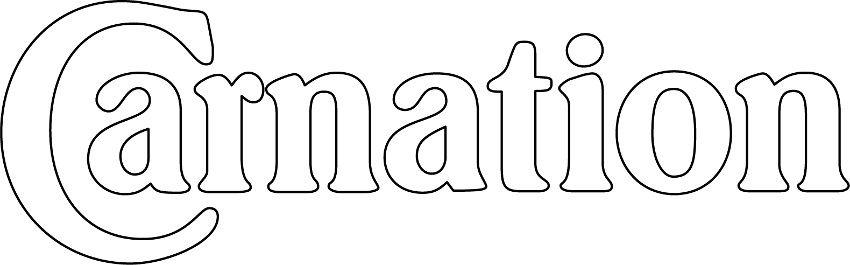

In [72]:
from IPython.display import Image, display_jpeg

display_jpeg(Image(file_list[0]))

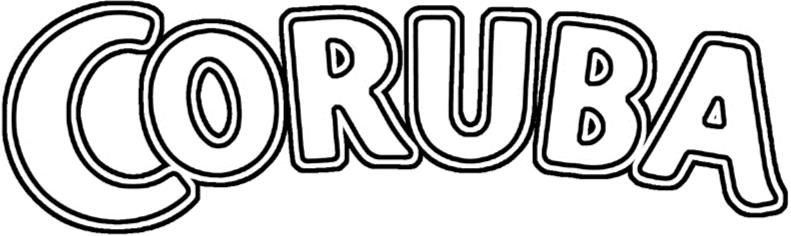

In [74]:
display_jpeg(Image(file_list[5]))

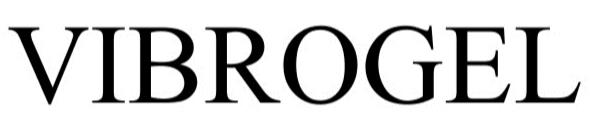

In [75]:
display_jpeg(Image(file_list[8]))

## Simple classification

In [8]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

In [9]:
img_path = '/work/data/images/71017330.jpg'

In [10]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03532672', 'hook', 0.25856137), ('n04275548', 'spider_web', 0.095146634), ('n03291819', 'envelope', 0.056449067)]


In [11]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)